<div style="background: linear-gradient(135deg, #001a70 0%, #0055d4 100%); color: white; padding: 25px; margin-bottom: 20px; text-align: center; border-radius: 10px;">
<h1 style="font-size: 32px; margin-bottom: 10px;">GenAI-Assisted Medical Triage System</h1>
<p style="margin: 0; font-size: 16px;">Enhancing clinical decision support with artificial intelligence</p>
<p style="margin-top: 10px; font-size: 18px; font-weight: bold;">Dr. Dehghani</p>
</div>

<div style="background: #f0f5ff; border-radius: 12px; padding: 20px; margin-bottom: 25px; border: 1px solid #0055d4;">
<h2 style="color: #0055d4; margin-top: 0; font-size: 24px; padding-bottom: 10px; border-bottom: 2px solid #0055d4;">Overview</h2>

<p style="line-height: 1.8; font-size: 16px;">This notebook demonstrates a GenAI-assisted medical triage system with two key components:</p>

<div style="display: flex; flex-wrap: wrap; gap: 15px; margin-top: 15px;">
    <div style="display: flex; align-items: center; background-color: white; padding: 10px 15px; border-radius: 8px; border-left: 3px solid #0055d4;"><span style="font-size: 24px; margin-right: 10px;">👤</span> <span><strong>Patient Generation</strong>: Using Gemini to create synthetic patient profiles</span></div>
    <div style="display: flex; align-items: center; background-color: white; padding: 10px 15px; border-radius: 8px; border-left: 3px solid #0055d4;"><span style="font-size: 24px; margin-right: 10px;">🏥</span> <span><strong>Triage Decision-Making</strong>: Using ChatGPT to evaluate and assign triage levels</span></div>
</div>

<p style="margin-top: 20px; font-style: italic; color: #0055d4;">The system generates patient information, processes it through a triage model, and provides clinical rationale for each decision.</p>

<hr style="margin: 20px 0; border: 0; border-top: 1px solid #ddd;">

<p style="font-size: 14px; color: #666;"><strong style="color: #f39c12;">Note:</strong> This demonstration is for educational purposes only and requires significant modifications for real-world clinical applications.</p>
</div>

<div style="background: white; border-radius: 12px; padding: 20px; margin-bottom: 25px; border: 1px solid #e0e0e0;">
<h2 style="color: #0055d4; margin-top: 0; font-size: 24px; padding-bottom: 10px; border-bottom: 2px solid #0055d4;">Learning Objectives</h2>

<ul style="line-height: 1.8; font-size: 16px;">
<li>Demonstrating the use of GenAI for medical applications</li>
<li>Implementing prompt engineering techniques in healthcare contexts</li>
<li>Integrating multiple AI models (Gemini and ChatGPT) in LangChain</li>
<li>Understanding AI-assisted clinical decision support systems</li>
</ul>
</div>


<div style="margin-bottom: 25px; padding-left: 15px; border-left: 4px solid #0055d4;">
<h2 style="color: #0055d4; margin-top: 0; font-size: 24px; padding-bottom: 10px; border-bottom: 2px solid #e0e0e0;">Imports and Setup</h2>

<p style="line-height: 1.6; font-size: 16px; color: #666;">Import necessary libraries and configure API access for Gemini and OpenAI models.</p>
</div>

In [ ]:
# 📦 Importing Libraries
import os
import json
import time
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from google.colab import userdata
from google import genai
import openai
from IPython.display import display, Markdown, HTML

plt.style.use('ggplot')
sns.set(style="whitegrid")

client = genai.Client(api_key=userdata.get('Gemini_API'))

print("Libraries imported and GenAI client initialized successfully.")

Libraries imported and GenAI client initialized successfully.


<div style="background: white; border-radius: 12px; padding: 20px; margin-bottom: 25px; border: 1px solid #0055d4;">
<h3 style="color: #0055d4; margin-top: 0; font-size: 20px;">API Keys Setup</h3>
<p>Configure your API keys for Gemini and OpenAI models. For security, use Colab Secrets whenever possible.</p>
</div>

In [ ]:
# 🔑 Get API keys from Colab Secrets
# You need to set these up in your Colab environment under "Secrets"

# Initialize OpenAI Client
from openai import OpenAI
openai_client = OpenAI(api_key=userdata.get('openai.api_key'))

# Initialize Gemini (Google GenAI) Client
from google import genai
gemini_client = genai.Client(api_key=userdata.get('Gemini_API'))

print("API keys configured successfully and clients initialized.")

API keys configured successfully and clients initialized.


<div style="background: linear-gradient(135deg, #f0f5ff 0%, #e6f0ff 100%); border-radius: 12px; padding: 25px; margin-bottom: 25px; border: 1px solid #0055d4;">
<h2 style="color: #0055d4; margin-top: 0; font-size: 24px; padding-bottom: 10px; border-bottom: 2px solid #0055d4;">👨‍⚕️ Patient Generation Functions</h2>
<p style="line-height: 1.6;">These functions use the Gemini model to generate synthetic patient profiles with realistic medical details for emergency department triage simulation.</p>
<div style="background-color: white; padding: 15px; border-radius: 8px; margin-top: 15px;">
    <h3 style="color: #0055d4; margin-top: 0;">Key Functions:</h3>
    <ul style="padding-left: 20px;">
        <li><strong>generate_patient()</strong>: Creates synthetic patient data using Gemini's generative AI, including demographics, symptoms, medical history, and vital signs</li>
        <li><strong>format_patient_data()</strong>: Transforms the generated JSON data into a readable format for display</li>
    </ul>
</div>
<div style="background-color: white; padding: 15px; border-radius: 8px; margin-top: 15px;">
    <h3 style="color: #0055d4; margin-top: 0;">Triage Classification:</h3>
    <p>The system uses the Emergency Severity Index (ESI) with 5 levels:</p>
    <ol style="padding-left: 20px;">
        <li><span style="color: #ff0000;"><strong>Immediate (Red)</strong></span>: Life-threatening conditions requiring immediate attention</li>
        <li><span style="color: #ff9900;"><strong>Very Urgent (Orange)</strong></span>: Potentially life-threatening, requires rapid assessment</li>
        <li><span style="color: #ffcc00;"><strong>Urgent (Yellow)</strong></span>: Serious but stable condition requiring timely assessment</li>
        <li><span style="color: #00cc00;"><strong>Standard (Green)</strong></span>: Standard cases with no immediate danger</li>
        <li><span style="color: #0099ff;"><strong>Non-Urgent (Blue)</strong></span>: Minor conditions that can safely wait</li>
    </ol>
</div>
<div style="background-color: #fff9e6; padding: 15px; border-radius: 8px; margin-top: 15px; border-left: 4px solid #ffc107;">
    <h3 style="color: #996600; margin-top: 0;">Notes on Implementation:</h3>
    <ul style="padding-left: 20px; line-height: 1.7;">
        <li><strong>Prompt Design:</strong> The prompt uses a Chain-of-Thought approach to guide the LLM through generating diverse and realistic patient profiles. It includes specific distribution instructions (e.g., 1 in 5 cases should be pediatric) to ensure variety.</li>
        <li><strong>Limitations:</strong> Despite careful prompt engineering, generated data may still exhibit bias and might not perfectly represent all age groups, genders, or medical conditions. Multiple rounds of iteration were needed to improve the prompt, but further enhancements are possible.</li>
        <li><strong>Error Handling:</strong> The code includes robust error handling to manage potential issues with LLM responses, including JSON parsing and formatting challenges.</li>
        <li><strong>Consistency Controls:</strong> The prompt includes instructions to ensure medical history, medications, and vital signs are internally consistent and appropriate for the patient's profile.</li>
        <li><strong>Response Cleaning:</strong> Special processing is needed to extract clean JSON from the LLM response, as models sometimes include markdown formatting or explanatory text.</li>
    </ul>
</div>
</div>

In [ ]:
# Define triage levels
TRIAGE_LEVELS = {
    1: "Immediate (Red): Life-threatening conditions requiring immediate attention",
    2: "Very Urgent (Orange): Potentially life-threatening, requires rapid assessment",
    3: "Urgent (Yellow): Serious but stable condition requiring timely assessment",
    4: "Standard (Green): Standard cases with no immediate danger",
    5: "Non-Urgent (Blue): Minor conditions that can safely wait"
}

def generate_patient(patient_id=None):
    if not patient_id:
        patient_id = f"PT-{datetime.now().strftime('%Y%m%d-%H%M')}-{random.randint(1000, 9999)}"

    prompt = f"""
    You are generating synthetic emergency room patients for a simulation.
    To maximize educational value, you must use a chain-of-thought reasoning strategy (internally, not in output) to ensure variety.

    **Chain-of-Thought Planning (do not include in output):**
    1. Randomly select an age group: infant/toddler (0–3), child (4–12), adolescent (13–18), young adult (19–39), adult (40–64), or elderly (65+). Avoid repeating the same age group in consecutive cases.
    2. Randomly select gender.
    3. Randomly select a chief complaint from a broad range: trauma, infection, psychiatric, allergy, pain, minor injury, medication issue, fever, seizure, behavioral, etc. Do not always choose chest pain or shortness of breath, and avoid repeating the same complaint in back-to-back cases. Make sure to include some mild cases as well.
    4. Out of every 5 cases: 1 should be pediatric, 2 should be under 40, 1 should be over 65, and 1 can be any age.
    5. Out of every 5 cases: only 1 should have a cardiac chief complaint (such as chest pain, myocardial infarction, or shortness of breath).
    6. Match medical history, medications, and allergies to the selected age, gender, and chief complaint. Vary these details between cases.
    7. Ensure the pain score and vital signs are consistent with the scenario, and allow for a wide range of values to show diversity.
    8. Occasionally include ambulance arrivals or accident/trauma cases among the generated patients.


    **OUTPUT REQUIREMENT:**
    ONLY return the JSON object below, nothing else.
    Populate all fields with realistic, non-repetitive, internally-consistent values, matching your planning above.

    {{
      "patient_id": "{patient_id}",
      "age": AGE,
      "sex": "GENDER",
      "chief_complaint": "PRIMARY_COMPLAINT",
      "symptoms": ["SYMPTOM1", "SYMPTOM2", ...],
      "medical_history": ["CONDITION1", "CONDITION2", ...],
      "medications": ["MEDICATION1", "MEDICATION2", ...],
      "allergies": ["ALLERGY1", "ALLERGY2", ...],
      "vitals": {{
        "temperature": TEMP_VALUE,
        "heart_rate": HR_VALUE,
        "blood_pressure": "BP_VALUE",
        "respiratory_rate": RR_VALUE,
        "oxygen_saturation": O2_VALUE
      }},
      "pain_score": PAIN_LEVEL
    }}
    """

    try:
        # UPDATED: Using the gemini_client initialized earlier and the newest Gemini 3 model
        response = gemini_client.models.generate_content(
            model='gemini-3-flash-preview',
            contents=prompt
        )
        response_text = response.text.strip()

        # Remove code block markers if present
        if response_text.startswith("```json"):
            response_text = response_text[7:]
        if response_text.startswith("```"):
            response_text = response_text[3:]
        if "```" in response_text:
            response_text = response_text.split("```")[0]

        # Find the first JSON object in the response
        json_start = response_text.find('{')
        # Robust closing bracket logic
        bracket_count = 0
        json_end = -1
        for i, c in enumerate(response_text[json_start:], start=json_start):
            if c == '{':
                bracket_count += 1
            elif c == '}':
                bracket_count -= 1
                if bracket_count == 0:
                    json_end = i + 1
                    break

        if json_start >= 0 and json_end > json_start:
            json_content = response_text[json_start:json_end]
            patient_data = json.loads(json_content)
            return patient_data
        else:
            raise ValueError("Could not extract valid JSON from Gemini response")

    except Exception as e:
        return f"❌ LLM did not respond properly: {e}"



# Function to convert patient data to a readable format
def format_patient_data(patient):
    """
    Formats patient data for display

    Args:
        patient: Dictionary containing patient information

    Returns:
        str: Formatted patient information
    """
    # Safety check if patient is an error string
    if isinstance(patient, str):
        return patient

    formatted = f"""
    ## Patient ID: {patient['patient_id']}

    **Demographics:** {patient['age']}-year-old {patient['sex']}
    **Chief Complaint:** {patient['chief_complaint']}

    **Symptoms:**
    - {', '.join(patient['symptoms'])}

    **Medical History:**
    - {', '.join(patient['medical_history'])}

    **Medications:**
    - {', '.join(patient['medications'])}

    **Allergies:**
    - {', '.join(patient['allergies'])}

    **Vitals:**
    - Temperature: {patient['vitals']['temperature']}°F
    - Heart Rate: {patient['vitals']['heart_rate']} bpm
    - Blood Pressure: {patient['vitals']['blood_pressure']}
    - Respiratory Rate: {patient['vitals']['respiratory_rate']} breaths/min
    - Oxygen Saturation: {patient['vitals']['oxygen_saturation']}%

    **Pain Score:** {patient['pain_score']}/10
    """
    return formatted

In [ ]:
# Generate 2 patients and display them
for i in range(1):
    print(f"\n{'='*50}\nGENERATING PATIENT #{i+1}\n{'='*50}")
    patient = generate_patient()

    # Check if we received an error message
    if isinstance(patient, str):
        print(patient)
    else:
        print(format_patient_data(patient))


GENERATING PATIENT #1

    ## Patient ID: PT-20260202-1907-5131

    **Demographics:** 74-year-old Female
    **Chief Complaint:** Sudden onset confusion and lethargy

    **Symptoms:**
    - Disorientation to time and place, Urinary frequency, Low-grade fever, Decreased oral intake, Malodorous urine

    **Medical History:**
    - Hypertension, Type 2 Diabetes Mellitus, Mild Cognitive Impairment, Osteoarthritis

    **Medications:**
    - Lisinopril 10mg, Metformin 500mg, Donepezil 5mg, Aspirin 81mg

    **Allergies:**
    - Trimethoprim-Sulfamethoxazole

    **Vitals:**
    - Temperature: 101.2°F
    - Heart Rate: 94 bpm
    - Blood Pressure: 112/64
    - Respiratory Rate: 18 breaths/min
    - Oxygen Saturation: 96%

    **Pain Score:** 2/10
    


<div style="background: linear-gradient(135deg, #f0f5ff 0%, #e6f0ff 100%); border-radius: 12px; padding: 25px; margin-bottom: 25px; border: 1px solid #0055d4;">
<h2 style="color: #0055d4; margin-top: 0; font-size: 24px; padding-bottom: 10px; border-bottom: 2px solid #0055d4;">🚑 AI-Powered Triage Decision System</h2>
<p style="line-height: 1.6;">This system uses OpenAI's GPT-4o model to evaluate patient information and recommend appropriate triage levels based on the Emergency Severity Index (ESI).</p>
<div style="background-color: white; padding: 15px; border-radius: 8px; margin-top: 15px;">
    <h3 style="color: #0055d4; margin-top: 0;">Key Functions:</h3>
    <ul style="padding-left: 20px;">
        <li><strong>triage_patient()</strong>: Analyzes patient data using GPT-4o to determine appropriate triage level, confidence score, rationale, and recommended actions</li>
        <li><strong>format_triage_results()</strong>: Creates a color-coded visual representation of the triage decision with clinical rationale</li>
    </ul>
</div>
<div style="background-color: white; padding: 15px; border-radius: 8px; margin-top: 15px;">
    <h3 style="color: #0055d4; margin-top: 0;">How It Works:</h3>
    <ol style="padding-left: 20px;">
        <li>Patient data is converted to a structured text format</li>
        <li>A specialized prompt instructs the LLM to act as an experienced emergency triage nurse</li>
        <li>The system provides the ESI triage scale definitions (Levels 1-5)</li>
        <li>GPT-4o analyzes the patient information and returns a structured JSON response</li>
        <li>Response includes triage level, confidence score, clinical rationale, and recommended actions</li>
        <li>Error handling ensures a fallback triage decision (Level 3) if the API fails</li>
        <li>Results are formatted with color-coding based on severity level</li>
    </ol>
</div>
<div style="background-color: white; padding: 15px; border-radius: 8px; margin-top: 15px;">
    <h3 style="color: #0055d4; margin-top: 0;">Prompt Design:</h3>
    <p>The prompt is carefully engineered to:</p>
    <ul style="padding-left: 20px;">
        <li>Establish the context (emergency triage nurse role)</li>
        <li>Provide clear definitions of each triage level</li>
        <li>Present structured patient information</li>
        <li>Request specific output format with triage level, confidence, rationale, and recommendations</li>
        <li>Emphasize evidence-based decision making considering vitals, symptoms, and medical history</li>
    </ul>
</div>
<div style="background-color: #fff0f0; padding: 15px; border-radius: 8px; margin-top: 15px; border-left: 4px solid #ff6b6b;">
    <h3 style="color: #d32f2f; margin-top: 0;">⚠️ Important Limitations:</h3>
    <ul style="padding-left: 20px; line-height: 1.7;">
        <li><strong>Confidence Level Accuracy:</strong> The confidence scores provided by the LLM may not accurately reflect actual clinical certainty. These values tend to be arbitrarily high and should not be solely relied upon for determining decision quality.</li>
        <li><strong>Clinical Validation Required:</strong> All LLM-based triage decisions must be validated by qualified healthcare professionals before application in any clinical setting. This system is for research and educational purposes only.</li>
        <li><strong>Potential Bias:</strong> The LLM may exhibit biases in its decision-making process based on its training data, potentially leading to systematic disparities in triage recommendations for different demographic groups.</li>
        <li><strong>Incomplete Information Handling:</strong> The system has limited ability to request additional information that would be standard in real triage scenarios, potentially leading to suboptimal decisions when critical data is missing.</li>
    </ul>
</div>
</div>

In [ ]:
def triage_patient(patient_data):
    """
    Determine triage level using OpenAI's ChatGPT

    Args:
        patient_data: Dictionary containing patient information

    Returns:
        dict: Triage decision including level, confidence, and rationale
    """
    # Convert patient data to text format for the prompt
    patient_text = json.dumps(patient_data, indent=2)

    # Create prompt for OpenAI
    prompt = f"""
    You are an experienced emergency department triage nurse.
    Based on the following patient information, assign an appropriate triage level using the Emergency Severity Index (ESI) from 1-5:

    - Level 1 (Immediate/Red): Life-threatening conditions requiring immediate treatment
    - Level 2 (Very Urgent/Orange): High risk, potentially life-threatening, rapid assessment needed
    - Level 3 (Urgent/Yellow): Serious but stable condition, requires timely assessment
    - Level 4 (Standard/Green): Standard cases, no immediate danger
    - Level 5 (Non-Urgent/Blue): Minor conditions that can safely wait

    PATIENT INFORMATION:
    {patient_text}

    Provide your assessment in the following JSON format:
    {{
      "triage_level": LEVEL_NUMBER,
      "triage_category": "CATEGORY_NAME",
      "confidence": CONFIDENCE_SCORE_0_TO_1,
      "rationale": "DETAILED_CLINICAL_RATIONALE",
      "recommended_actions": ["ACTION1", "ACTION2", ...]
    }}

    Ensure your triage decision is evidence-based and considers the patient's vitals, symptoms, and medical history.
    """

    try:
        # UPDATED: Using the modern OpenAI client-based architecture (initialized earlier as openai_client)
        # Using gpt-5.2, the 2026 flagship reasoning model
        response = openai_client.chat.completions.create(
            model="gpt-5.2",
            messages=[
                {"role": "system", "content": "You are an experienced emergency medicine triage nurse. Provide accurate, evidence-based triage decisions."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.2,
            max_tokens=1000
        )

        # Extract the response text
        response_text = response.choices[0].message.content

        # Find JSON content (between curly braces)
        json_start = response_text.find('{')
        json_end = response_text.rfind('}') + 1

        if json_start >= 0 and json_end > 0:
            json_content = response_text[json_start:json_end]
            triage_decision = json.loads(json_content)
            return triage_decision
        else:
            raise ValueError("Could not extract valid JSON from API response")

    except Exception as e:
        print(f"Error in triage decision: {e}")
        # Return fallback triage data
        return {
            "triage_level": 3,
            "triage_category": "Urgent (Yellow)",
            "confidence": 0.75,
            "rationale": "Fallback triage decision due to API error",
            "recommended_actions": ["Assessment by physician", "Vital signs monitoring"]
        }

# Function to format triage results
def format_triage_results(triage_result):
    """
    Formats triage results for display

    Args:
        triage_result: Dictionary containing triage decision

    Returns:
        str: Formatted triage decision
    """
    # Define color mapping for triage levels
    triage_colors = {
        1: "#ff0000",  # Red
        2: "#ff9900",  # Orange
        3: "#ffff00",  # Yellow
        4: "#00cc00",  # Green
        5: "#0099ff"   # Blue
    }

    level = triage_result['triage_level']
    color = triage_colors.get(level, "#999999")

    formatted = f"""
    ## Triage Decision

    <div style="background-color: {color}; color: {'white' if level <= 2 else 'black'}; padding: 10px; border-radius: 5px; margin: 10px 0;">
    <h3>Level {level}: {triage_result['triage_category']}</h3>
    <p><strong>Confidence:</strong> {triage_result['confidence']*100:.1f}%</p>
    </div>

    **Clinical Rationale:**
    {triage_result['rationale']}

    **Recommended Actions:**
    - {', '.join(triage_result['recommended_actions'])}
    """
    return formatted

<div style="background: linear-gradient(135deg, #e6f7ff 0%, #d1edff 100%); border-radius: 12px; padding: 20px; margin-bottom: 25px; border: 1px solid #0066cc;">
<h2 style="color: #0066cc; margin-top: 0; font-size: 24px; padding-bottom: 10px; border-bottom: 2px solid #0066cc;">🔬 Triage Experiment Runner</h2>
<p style="line-height: 1.6;">The <code>run_triage_experiment()</code> function coordinates the end-to-end triage simulation process, from patient generation to result analysis.</p>
<div style="background-color: white; padding: 15px; border-radius: 8px; margin-top: 15px;">
    <h3 style="color: #0066cc; margin-top: 0;">Key Features:</h3>
    <ul style="padding-left: 20px;">
        <li><strong>Batch Processing:</strong> Handles multiple patient cases (default: 10) in sequence</li>
        <li><strong>Performance Tracking:</strong> Measures and records time spent on patient generation and triage</li>
        <li><strong>Visualization:</strong> Displays formatted patient data and color-coded triage decisions</li>
        <li><strong>Data Collection:</strong> Compiles demographics and triage results into a structured DataFrame</li>
    </ul>
</div>
<div style="background-color: #f0f8ff; padding: 15px; border-radius: 8px; margin-top: 15px; border-left: 4px solid #0066cc;">
    <h3 style="color: #0055aa; margin-top: 0;">Usage Notes:</h3>
    <p style="margin-bottom: 8px;">Control the experiment with these parameters:</p>
    <ul style="padding-left: 20px; margin-bottom: 0;">
        <li><code>num_patients</code>: Set the sample size (higher values provide better distribution analysis)</li>
        <li><code>verbose</code>: Enable/disable detailed output for each patient case</li>
    </ul>
</div>
</div>

In [ ]:
def run_triage_experiment(num_patients=10, verbose=True):
    """
    Run the triage experiment for a specified number of patients

    Args:
        num_patients: Number of synthetic patients to generate and triage
        verbose: Whether to display detailed information for each patient

    Returns:
        DataFrame: Results of all triage decisions
    """
    results = []

    print(f"Starting GenAI-Assisted Medical Triage Experiment with {num_patients} patients")
    print("=" * 80)

    for i in range(num_patients):
        print(f"\nProcessing Patient {i+1}/{num_patients}...")

        # Generate patient data
        start_time = time.time()
        patient = generate_patient()
        patient_gen_time = time.time() - start_time

        # Safety check: if generate_patient returned an error string instead of a dict
        if isinstance(patient, str):
            print(f"Skipping Patient {i+1} due to error: {patient}")
            continue

        # Perform triage decision
        start_time = time.time()
        triage_decision = triage_patient(patient)
        triage_time = time.time() - start_time

        # Store results
        results.append({
            "patient_id": patient["patient_id"],
            "age": patient["age"],
            "sex": patient["sex"],
            "chief_complaint": patient["chief_complaint"],
            "triage_level": triage_decision["triage_level"],
            "triage_category": triage_decision["triage_category"],
            "confidence": triage_decision["confidence"],
            "patient_gen_time": patient_gen_time,
            "triage_time": triage_time,
            "rationale": triage_decision.get("rationale", "N/A")
        })

        # Display verbose output if requested
        if verbose:
            display(Markdown(format_patient_data(patient)))
            display(HTML(format_triage_results(triage_decision)))
            print("-" * 80)

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    print("\nExperiment completed successfully!")
    return results_df

<div style="background: white; border-radius: 12px; padding: 20px; margin-bottom: 25px; border: 1px solid #0055d4;">
<h3 style="color: #0055d4; margin-top: 0; font-size: 20px;">📊 Results Analysis</h3>
<p>This function analyzes and visualizes the experiment results with charts and statistics.</p>
</div>

In [ ]:
def analyze_results(results_df):
    """
    Analyze and visualize the results of the triage experiment

    Args:
        results_df: DataFrame containing experiment results

    Returns:
        None (displays visualizations)
    """
    # Print summary statistics
    print("\n=== Triage Experiment Summary ===\n")
    print(f"Total patients processed: {len(results_df)}")

    # Distribution of triage levels
    level_counts = results_df['triage_level'].value_counts().sort_index()

    print("\nTriage Level Distribution:")
    for level, count in level_counts.items():
        category_name = TRIAGE_LEVELS[level].split(':')[0]
        print(f"Level {level} ({category_name}): {count} patients ({count/len(results_df)*100:.1f}%)")

    # Average processing times
    print(f"\nAverage patient generation time: {results_df['patient_gen_time'].mean():.2f} seconds")
    print(f"Average triage decision time: {results_df['triage_time'].mean():.2f} seconds")
    print(f"Total average processing time per patient: {(results_df['patient_gen_time'] + results_df['triage_time']).mean():.2f} seconds")

    # Create visualizations
    plt.figure(figsize=(15, 10))

    # 1. Triage level distribution
    plt.subplot(2, 2, 1)
    colors = ['#ff0000', '#ff9900', '#ffff00', '#00cc00', '#0099ff']
    # Select only the colors corresponding to levels present in the data
    current_colors = [colors[i-1] for i in level_counts.index]

    bars = plt.bar(level_counts.index, level_counts.values, color=current_colors)
    plt.title('Distribution of Triage Levels')
    plt.xlabel('Triage Level')
    plt.ylabel('Number of Patients')
    plt.xticks(level_counts.index)

    # Modern bar labeling using ax.bar_label
    ax1 = plt.gca()
    ax1.bar_label(bars, labels=[f'{v/len(results_df)*100:.1f}%' for v in level_counts.values], padding=3)

    # 2. Age distribution by triage level
    plt.subplot(2, 2, 2)
    # UPDATED: Set 'hue' to avoid FutureWarnings and 'legend=False' for cleaner plots
    sns.boxplot(x='triage_level', y='age', data=results_df, hue='triage_level', palette=current_colors, legend=False)
    plt.title('Age Distribution by Triage Level')
    plt.xlabel('Triage Level')
    plt.ylabel('Age')

    # 3. Confidence scores by triage level
    plt.subplot(2, 2, 3)
    sns.boxplot(x='triage_level', y='confidence', data=results_df, hue='triage_level', palette=current_colors, legend=False)
    plt.title('Confidence Scores by Triage Level')
    plt.xlabel('Triage Level')
    plt.ylabel('Confidence Score')
    plt.ylim(0, 1)

    # 4. Processing time
    plt.subplot(2, 2, 4)
    time_data = results_df[['patient_gen_time', 'triage_time']].copy()
    time_data.columns = ['Patient Generation', 'Triage Decision']

    # Plotting using the axis directly for better control
    time_data.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title('Processing Time by Patient')
    plt.xlabel('Patient Index')
    plt.ylabel('Time (seconds)')
    # Hide individual index labels if there are many patients
    if len(results_df) > 20:
        plt.xticks([])
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

    # Display final conclusions
    print("\n=== Key Findings ===")
    if not level_counts.empty:
        most_common_level = level_counts.idxmax()
        print(f"- Most common triage level: Level {most_common_level} ({TRIAGE_LEVELS[most_common_level].split(':')[0]})")

    print(f"- Average model confidence: {results_df['confidence'].mean()*100:.1f}%")
    print(f"- Gender distribution: {results_df['sex'].value_counts().to_dict()}")

    # Chief complaints analysis
    complaints = results_df['chief_complaint'].value_counts()
    print(f"- Top chief complaints: {', '.join(complaints.index[:3])}")

    # Efficiency assessment
    total_time = results_df['patient_gen_time'].sum() + results_df['triage_time'].sum()
    print(f"- Total processing time for all {len(results_df)} patients: {total_time:.2f} seconds")

<div style="background: linear-gradient(135deg, #f0f5ff 0%, #e6f0ff 100%); border-radius: 12px; padding: 25px; margin-bottom: 25px; border: 1px solid #0055d4;">
<h2 style="color: #0055d4; margin-top: 0; font-size: 24px; padding-bottom: 10px; border-bottom: 2px solid #0055d4;">▶️ Execute the Experiment</h2>

<p style="line-height: 1.6;">Run this cell to execute the triage experiment with 10 synthetic patients.</p>
<p><strong>Note:</strong> This will make API calls to both Gemini and OpenAI which may incur charges based on your usage tiers.</p>

<ul style="padding-left: 25px; margin-top: 15px; color: #555;">
  <li><strong>Execution time:</strong> The complete experiment typically takes 3-5 minutes to run depending on API response times</li>
  <li><strong>Output:</strong> Results will be stored in the <code>experiment_results</code> variable for further analysis</li>
</ul>
</div>

Starting GenAI-Assisted Medical Triage Experiment with 10 patients

Processing Patient 1/10...
Error in triage decision: Error code: 400 - {'error': {'message': "Unsupported parameter: 'max_tokens' is not supported with this model. Use 'max_completion_tokens' instead.", 'type': 'invalid_request_error', 'param': 'max_tokens', 'code': 'unsupported_parameter'}}



    ## Patient ID: PT-20260202-1917-6695

    **Demographics:** 24-year-old Female
    **Chief Complaint:** Severe anxiety and palpitations

    **Symptoms:**
    - Palpitations, Shortness of breath, Trembling, Paresthesia in extremities, Feeling of impending doom

    **Medical History:**
    - Generalized Anxiety Disorder, Irritable Bowel Syndrome

    **Medications:**
    - Escitalopram 10mg daily, Dicyclomine 20mg as needed

    **Allergies:**
    - Penicillin

    **Vitals:**
    - Temperature: 98.4°F
    - Heart Rate: 112 bpm
    - Blood Pressure: 138/86
    - Respiratory Rate: 24 breaths/min
    - Oxygen Saturation: 99%

    **Pain Score:** 2/10
    

--------------------------------------------------------------------------------

Processing Patient 2/10...
Error in triage decision: Error code: 400 - {'error': {'message': "Unsupported parameter: 'max_tokens' is not supported with this model. Use 'max_completion_tokens' instead.", 'type': 'invalid_request_error', 'param': 'max_tokens', 'code': 'unsupported_parameter'}}



    ## Patient ID: PT-20260202-1917-9129

    **Demographics:** 45-year-old Female
    **Chief Complaint:** Lower leg redness and swelling

    **Symptoms:**
    - Localized warmth, Pain, Spreading erythema, Low-grade fever

    **Medical History:**
    - Type 2 Diabetes Mellitus, Hypothyroidism

    **Medications:**
    - Metformin 500mg BID, Levothyroxine 75mcg daily

    **Allergies:**
    - Sulfa drugs

    **Vitals:**
    - Temperature: 99.8°F
    - Heart Rate: 88 bpm
    - Blood Pressure: 134/82
    - Respiratory Rate: 16 breaths/min
    - Oxygen Saturation: 98%

    **Pain Score:** 5/10
    

--------------------------------------------------------------------------------

Processing Patient 3/10...
Error in triage decision: Error code: 400 - {'error': {'message': "Unsupported parameter: 'max_tokens' is not supported with this model. Use 'max_completion_tokens' instead.", 'type': 'invalid_request_error', 'param': 'max_tokens', 'code': 'unsupported_parameter'}}



    ## Patient ID: PT-20260202-1918-6513

    **Demographics:** 74-year-old Female
    **Chief Complaint:** Acute onset of confusion and agitation

    **Symptoms:**
    - Disorientation to time and place, Increased wandering, Restlessness, Verbal aggression

    **Medical History:**
    - Early-stage Alzheimer's disease, Hypertension, Osteoarthritis

    **Medications:**
    - Donepezil 10mg daily, Lisinopril 20mg daily, Acetaminophen 500mg as needed

    **Allergies:**
    - Sulfamethoxazole

    **Vitals:**
    - Temperature: 98.9°F
    - Heart Rate: 94 bpm
    - Blood Pressure: 148/92
    - Respiratory Rate: 20 breaths/min
    - Oxygen Saturation: 97%

    **Pain Score:** 2/10
    

--------------------------------------------------------------------------------

Processing Patient 4/10...
Error in triage decision: Error code: 400 - {'error': {'message': "Unsupported parameter: 'max_tokens' is not supported with this model. Use 'max_completion_tokens' instead.", 'type': 'invalid_request_error', 'param': 'max_tokens', 'code': 'unsupported_parameter'}}



    ## Patient ID: PT-20260202-1918-8857

    **Demographics:** 8-year-old Male
    **Chief Complaint:** Allergic reaction

    **Symptoms:**
    - Hives on trunk and arms, Swelling of the lips, Itchy throat, Mild wheezing

    **Medical History:**
    - Mild intermittent asthma

    **Medications:**
    - Albuterol inhaler as needed

    **Allergies:**
    - Peanuts, Shellfish

    **Vitals:**
    - Temperature: 98.6°F
    - Heart Rate: 115 bpm
    - Blood Pressure: 102/68
    - Respiratory Rate: 24 breaths/min
    - Oxygen Saturation: 95%

    **Pain Score:** 3/10
    

--------------------------------------------------------------------------------

Processing Patient 5/10...
Error in triage decision: Error code: 400 - {'error': {'message': "Unsupported parameter: 'max_tokens' is not supported with this model. Use 'max_completion_tokens' instead.", 'type': 'invalid_request_error', 'param': 'max_tokens', 'code': 'unsupported_parameter'}}



    ## Patient ID: PT-20260202-1918-8814

    **Demographics:** 5-year-old Female
    **Chief Complaint:** Barking cough and difficulty breathing

    **Symptoms:**
    - Inspiratory stridor at rest, Seal-like barking cough, Hoarseness, Rhinorrhea, Low-grade fever, Intercostal retractions

    **Medical History:**
    - Premature birth (34 weeks), Mild intermittent asthma

    **Medications:**
    - Albuterol HFA inhaler as needed

    **Allergies:**
    - No Known Drug Allergies

    **Vitals:**
    - Temperature: 100.2°F
    - Heart Rate: 134 bpm
    - Blood Pressure: 104/68
    - Respiratory Rate: 32 breaths/min
    - Oxygen Saturation: 94%

    **Pain Score:** 3/10
    

--------------------------------------------------------------------------------

Processing Patient 6/10...
Error in triage decision: Error code: 400 - {'error': {'message': "Unsupported parameter: 'max_tokens' is not supported with this model. Use 'max_completion_tokens' instead.", 'type': 'invalid_request_error', 'param': 'max_tokens', 'code': 'unsupported_parameter'}}



    ## Patient ID: PT-20260202-1918-6229

    **Demographics:** 78-year-old Female
    **Chief Complaint:** Acute confusion and urinary frequency

    **Symptoms:**
    - Altered mental status, Dysuria, Lower abdominal pressure, Foul-smelling urine, Mild lethargy

    **Medical History:**
    - Hypertension, Type 2 Diabetes mellitus, Hyperlipidemia, Osteoarthritis

    **Medications:**
    - Lisinopril 20mg, Metformin 1000mg, Atorvastatin 40mg, Aspirin 81mg

    **Allergies:**
    - Penicillin, Sulfa drugs

    **Vitals:**
    - Temperature: 100.6°F
    - Heart Rate: 96 bpm
    - Blood Pressure: 134/88
    - Respiratory Rate: 19 breaths/min
    - Oxygen Saturation: 96%

    **Pain Score:** 4/10
    

--------------------------------------------------------------------------------

Processing Patient 7/10...
Error in triage decision: Error code: 400 - {'error': {'message': "Unsupported parameter: 'max_tokens' is not supported with this model. Use 'max_completion_tokens' instead.", 'type': 'invalid_request_error', 'param': 'max_tokens', 'code': 'unsupported_parameter'}}



    ## Patient ID: PT-20260202-1918-8064

    **Demographics:** 8-year-old Female
    **Chief Complaint:** Acute abdominal pain

    **Symptoms:**
    - Nausea, Loss of appetite, Pain localized to the right lower quadrant, Low-grade fever

    **Medical History:**
    - Mild intermittent asthma, Seasonal allergies

    **Medications:**
    - Albuterol HFA inhaler (as needed for wheezing), Children's Multivitamin

    **Allergies:**
    - Penicillin

    **Vitals:**
    - Temperature: 100.6°F
    - Heart Rate: 118 bpm
    - Blood Pressure: 104/66
    - Respiratory Rate: 22 breaths/min
    - Oxygen Saturation: 98%

    **Pain Score:** 7/10
    

--------------------------------------------------------------------------------

Processing Patient 8/10...
Error in triage decision: Error code: 400 - {'error': {'message': "Unsupported parameter: 'max_tokens' is not supported with this model. Use 'max_completion_tokens' instead.", 'type': 'invalid_request_error', 'param': 'max_tokens', 'code': 'unsupported_parameter'}}



    ## Patient ID: PT-20260202-1918-2131

    **Demographics:** 78-year-old Female
    **Chief Complaint:** Acute confusion and agitation

    **Symptoms:**
    - Altered mental status, Disorientation, Decreased appetite, Foul-smelling urine, Malaise

    **Medical History:**
    - Early-stage Dementia, Hypertension, Hypothyroidism, Osteoarthritis

    **Medications:**
    - Donepezil, Lisinopril, Levothyroxine, Acetaminophen

    **Allergies:**
    - Penicillin, Sulfa drugs

    **Vitals:**
    - Temperature: 101.4°F
    - Heart Rate: 98 bpm
    - Blood Pressure: 138/86
    - Respiratory Rate: 19 breaths/min
    - Oxygen Saturation: 95%

    **Pain Score:** 2/10
    

--------------------------------------------------------------------------------

Processing Patient 9/10...
Error in triage decision: Error code: 400 - {'error': {'message': "Unsupported parameter: 'max_tokens' is not supported with this model. Use 'max_completion_tokens' instead.", 'type': 'invalid_request_error', 'param': 'max_tokens', 'code': 'unsupported_parameter'}}



    ## Patient ID: PT-20260202-1919-1775

    **Demographics:** 72-year-old Female
    **Chief Complaint:** Altered mental status and urinary frequency

    **Symptoms:**
    - Confusion, Lethargy, Dysuria, Foul-smelling urine, Lower abdominal discomfort

    **Medical History:**
    - Type 2 Diabetes Mellitus, Atrial Fibrillation, Hypertension, Osteoarthritis

    **Medications:**
    - Metformin 500mg BID, Warfarin 5mg daily, Lisinopril 10mg daily, Acetaminophen 500mg PRN

    **Allergies:**
    - Codeine, Sulfa drugs

    **Vitals:**
    - Temperature: 100.2°F
    - Heart Rate: 94 bpm
    - Blood Pressure: 118/76
    - Respiratory Rate: 18 breaths/min
    - Oxygen Saturation: 95%

    **Pain Score:** 3/10
    

--------------------------------------------------------------------------------

Processing Patient 10/10...
Error in triage decision: Error code: 400 - {'error': {'message': "Unsupported parameter: 'max_tokens' is not supported with this model. Use 'max_completion_tokens' instead.", 'type': 'invalid_request_error', 'param': 'max_tokens', 'code': 'unsupported_parameter'}}



    ## Patient ID: PT-20260202-1919-8634

    **Demographics:** 78-year-old Male
    **Chief Complaint:** Altered mental status and poor oral intake

    **Symptoms:**
    - Confusion, Disorientation to time, Decreased appetite, Foul-smelling urine, Lethargy

    **Medical History:**
    - Hypertension, Type 2 Diabetes Mellitus, Benign Prostatic Hyperplasia, Hyperlipidemia

    **Medications:**
    - Lisinopril 10mg, Metformin 500mg, Tamsulosin 0.4mg, Atorvastatin 20mg

    **Allergies:**
    - Penicillin

    **Vitals:**
    - Temperature: 101.2°F
    - Heart Rate: 94 bpm
    - Blood Pressure: 138/82
    - Respiratory Rate: 18 breaths/min
    - Oxygen Saturation: 96%

    **Pain Score:** 2/10
    

--------------------------------------------------------------------------------

Experiment completed successfully!

=== Triage Experiment Summary ===

Total patients processed: 10

Triage Level Distribution:
Level 3 (Urgent (Yellow)): 10 patients (100.0%)

Average patient generation time: 12.09 seconds
Average triage decision time: 0.23 seconds
Total average processing time per patient: 12.32 seconds


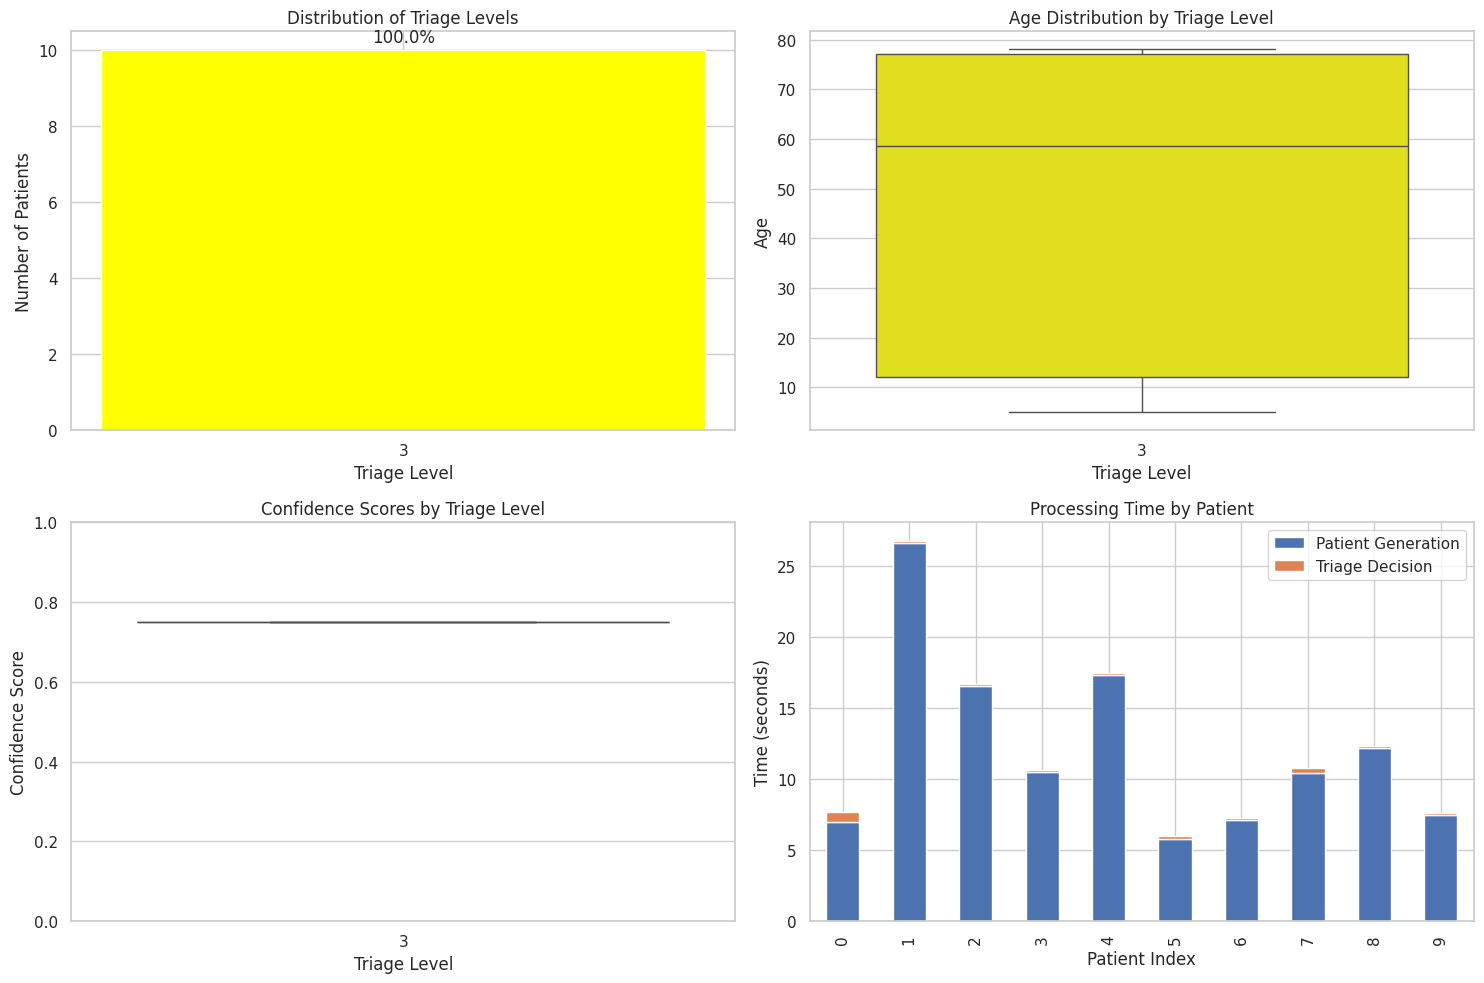


=== Key Findings ===
- Most common triage level: Level 3 (Urgent (Yellow))
- Average model confidence: 75.0%
- Gender distribution: {'Female': 8, 'Male': 2}
- Top chief complaints: Severe anxiety and palpitations, Lower leg redness and swelling, Acute onset of confusion and agitation
- Total processing time for all 10 patients: 123.23 seconds


In [ ]:
# Run the experiment with 10 synthetic patients
# Uncomment to run the experiment
results = run_triage_experiment(num_patients=10, verbose=True)
analyze_results(results)


<div style="background: linear-gradient(135deg, #001a70 0%, #0055d4 100%); color: white; padding: 25px; margin-top: 30px; text-align: center; border-radius: 10px;">
<h2 style="margin-top: 0;">Conclusion</h2>

<div style="background: white; border-radius: 12px; padding: 20px; margin-top: 20px; color: #333; text-align: left;">
<p>This notebook demonstrates how generative AI can be applied to healthcare triage systems:</p>

<ol>
    <li><strong>Patient Generation:</strong> Gemini successfully creates diverse, medically coherent patient profiles.</li>
    <li><strong>Triage Decision-Making:</strong> ChatGPT effectively analyzes patient data and assigns appropriate triage levels with clinical rationale.</li>
    <li><strong>Analysis:</strong> The system provides insights into triage distribution, processing efficiency, and decision confidence.</li>
</ol>

<h3 style="color: #0055d4;">Future Enhancements</h3>
<ul>
    <li>Integrate with electronic health record systems</li>
    <li>Add validation against expert clinician decisions</li>
    <li>Expand to specialty-specific triage protocols</li>
    <li>Implement real-time monitoring dashboard</li>
</ul>

<h3 style="color: #0055d4;">Limitations</h3>
<ul>
    <li>Model outputs should always be verified by healthcare professionals</li>
    <li>Clinical accuracy depends on prompt design and model capabilities</li>
    <li>System requires rigorous testing before clinical implementation</li>
</ul>

<p style="font-style: italic; margin-top: 20px; color: #0055d4;">This laboratory exercise demonstrates the potential of GenAI to accelerate healthcare innovation while maintaining clinical rigor and patient safety.</p>
</div>
</div>

<div style="background: linear-gradient(135deg, #fff0e0 0%, #ffe6cc 100%); border-radius: 12px; padding: 25px; margin-bottom: 25px; border: 1px solid #ff9933;">
<h2 style="color: #cc6600; margin-top: 0; font-size: 24px; padding-bottom: 10px; border-bottom: 2px solid #cc6600;">👥 Human-in-the-Loop Triage Integration</h2>
<p style="line-height: 1.6;">The updated triage system now incorporates healthcare provider expertise through a human-in-the-loop approach, ensuring critical oversight of AI decisions.</p>
<div style="background-color: white; padding: 15px; border-radius: 8px; margin-top: 15px;">
    <h3 style="color: #cc6600; margin-top: 0;">Key Enhancements:</h3>
    <ul style="padding-left: 20px;">
        <li><strong>Confidence Threshold:</strong> The system now uses a 95% confidence threshold to identify uncertain decisions</li>
        <li><strong>Interactive Confirmation:</strong> Healthcare providers review and can override AI suggestions</li>
        <li><strong>Decision Documentation:</strong> The system records whether the provider confirmed or modified the AI recommendation</li>
        <li><strong>Full Transparency:</strong> Providers see complete patient information and AI reasoning before making decisions</li>
    </ul>
</div>
<div style="background-color: white; padding: 15px; border-radius: 8px; margin-top: 15px;">
    <h3 style="color: #cc6600; margin-top: 0;">Workflow Process:</h3>
    <ol style="padding-left: 20px;">
        <li>AI analyzes patient data and assigns a preliminary triage level</li>
        <li>System displays patient information and AI's assessment to the healthcare provider</li>
        <li>If AI confidence is below 95%, a warning is prominently displayed</li>
        <li>Provider reviews the suggestion and selects the final triage level</li>
        <li>The system documents whether the provider confirmed or changed the AI recommendation</li>
        <li>Final triage decision receives 100% confidence as it has been validated by a healthcare professional</li>
    </ol>
</div>
<div style="background-color: #fff9e6; padding: 15px; border-radius: 8px; margin-top: 15px; border-left: 4px solid #ff9933;">
    <h3 style="color: #cc6600; margin-top: 0;">Clinical Benefits:</h3>
    <ul style="padding-left: 20px; line-height: 1.7;">
        <li><strong>Safety Enhancement:</strong> Prevents over-reliance on AI by requiring human verification</li>
        <li><strong>Knowledge Transfer:</strong> Clinicians can learn from AI suggestions while applying their expertise</li>
        <li><strong>Audit Trail:</strong> Creates documentation of decision-making process for quality improvement</li>
        <li><strong>Continuous Improvement:</strong> System can track agreement rates between AI and providers to identify patterns</li>
    </ul>
</div>
<div style="background-color: white; padding: 15px; border-radius: 8px; margin-top: 15px;">
    <h3 style="color: #cc6600; margin-top: 0;">Implementation Highlights:</h3>
    <pre style="background-color: #f8f8f8; padding: 10px; border-radius: 4px; font-size: 12px; overflow-x: auto; margin: 0;">
# Key code updates:
if triage_decision["confidence"] < confidence_threshold:
    print(f"⚠️ ATTENTION: AI confidence ({triage_decision['confidence']*100:.1f}%) is below threshold")


In [ ]:
def triage_patient(patient_data, confidence_threshold=0.95):
    """
    Determine triage level using OpenAI's ChatGPT with human-in-the-loop confirmation

    Args:
        patient_data: Dictionary containing patient information
        confidence_threshold: Minimum confidence level required (default: 0.95)

    Returns:
        dict: Triage decision including level, confidence, and rationale
    """
    patient_text = json.dumps(patient_data, indent=2)

    prompt = f"""
    You are an experienced emergency department triage nurse.
    Based on the following patient information, assign an appropriate triage level using the Emergency Severity Index (ESI) from 1-5:

    - Level 1 (Immediate/Red): Life-threatening conditions requiring immediate treatment
    - Level 2 (Very Urgent/Orange): High risk, potentially life-threatening, rapid assessment needed
    - Level 3 (Urgent/Yellow): Serious but stable condition, requires timely assessment
    - Level 4 (Standard/Green): Standard cases, no immediate danger
    - Level 5 (Non-Urgent/Blue): Minor conditions that can safely wait

    PATIENT INFORMATION:
    {patient_text}

    Provide your assessment in the following JSON format:
    {{
      "triage_level": LEVEL_NUMBER,
      "triage_category": "CATEGORY_NAME",
      "confidence": CONFIDENCE_SCORE_0_TO_1,
      "rationale": "DETAILED_CLINICAL_RATIONALE",
      "recommended_actions": ["ACTION1", "ACTION2", ...]
    }}

    Ensure your triage decision is evidence-based and considers the patient's vitals, symptoms, and medical history.
    """

    try:
        # UPDATED: Using the 2026 Client architecture and GPT-5.2
        response = openai_client.chat.completions.create(
            model="gpt-5.2",
            messages=[
                {"role": "system", "content": "You are an experienced emergency medicine triage nurse. Provide accurate, evidence-based triage decisions."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.2,
            max_tokens=1000
        )

        response_text = response.choices[0].message.content

        # Extract JSON
        json_start = response_text.find('{')
        json_end = response_text.rfind('}') + 1

        if json_start >= 0 and json_end > 0:
            json_content = response_text[json_start:json_end]
            triage_decision = json.loads(json_content)

            # Display Patient Info and AI Suggestion
            print("\n" + "="*40)
            print("      PATIENT CLINICAL DATA      ")
            print("="*40)
            print(patient_text)
            print("\n" + "="*40)
            print("      AI TRIAGE ASSESSMENT      ")
            print("="*40)
            print(f"Level {triage_decision['triage_level']}: {triage_decision['triage_category']}")
            print(f"Confidence: {triage_decision['confidence']*100:.1f}%")
            print(f"Rationale: {triage_decision['rationale']}")

            # Highlight low confidence
            if triage_decision["confidence"] < confidence_threshold:
                print(f"\n⚠️  LOW CONFIDENCE ALERT: AI is only {triage_decision['confidence']*100:.1f}% certain.")

            # Human-in-the-loop interaction
            print("\nSelect Triage Level:")
            print("1: Immediate (Red)    | 2: Very Urgent (Orange)")
            print("3: Urgent (Yellow)    | 4: Standard (Green)")
            print("5: Non-Urgent (Blue)")

            while True:
                user_input = input(f"\nEnter level (1-5) [Press Enter to accept AI Level {triage_decision['triage_level']}]: ").strip()

                # Default to AI suggestion if input is empty
                if user_input == "":
                    user_level = triage_decision['triage_level']
                else:
                    try:
                        user_level = int(user_input)
                    except ValueError:
                        print("Please enter a valid number (1-5).")
                        continue

                if 1 <= user_level <= 5:
                    triage_categories = {
                        1: "Immediate (Red)", 2: "Very Urgent (Orange)",
                        3: "Urgent (Yellow)", 4: "Standard (Green)", 5: "Non-Urgent (Blue)"
                    }

                    if user_level != triage_decision['triage_level']:
                        old_l, old_c = triage_decision['triage_level'], triage_decision['triage_category']
                        triage_decision["triage_level"] = user_level
                        triage_decision["triage_category"] = triage_categories[user_level]
                        triage_decision["rationale"] += f"\n\n[PROVIDER OVERRIDE]: Changed from Level {old_l} ({old_c}) to Level {user_level}."
                    else:
                        triage_decision["rationale"] += "\n\n[PROVIDER CONFIRMED]: AI suggestion accepted by healthcare provider."

                    triage_decision["confidence"] = 1.0  # Finalized decision
                    break
                else:
                    print("Invalid level. Please choose 1, 2, 3, 4, or 5.")

            return triage_decision
        else:
            raise ValueError("Invalid JSON format in model response.")

    except Exception as e:
        print(f"Error in triage decision: {e}")
        return {
            "triage_level": 3,
            "triage_category": "Urgent (Yellow)",
            "confidence": 0.75,
            "rationale": "Fallback due to API error.",
            "recommended_actions": ["Manual Assessment Required"]
        }

Starting GenAI-Assisted Medical Triage Experiment with 10 patients

Processing Patient 1/10...
Error in triage decision: Error code: 400 - {'error': {'message': "Unsupported parameter: 'max_tokens' is not supported with this model. Use 'max_completion_tokens' instead.", 'type': 'invalid_request_error', 'param': 'max_tokens', 'code': 'unsupported_parameter'}}



    ## Patient ID: PT-20260202-1919-1298

    **Demographics:** 72-year-old Female
    **Chief Complaint:** Sudden onset confusion and urinary frequency

    **Symptoms:**
    - Altered mental status, Dysuria, Low-grade fever, Lower abdominal pressure, Chills

    **Medical History:**
    - Hypertension, Type 2 Diabetes Mellitus, Osteoarthritis, Hyperlipidemia

    **Medications:**
    - Lisinopril 20mg, Metformin 1000mg, Atorvastatin 40mg, Acetaminophen 500mg as needed

    **Allergies:**
    - Penicillin (Rash), Sulfa drugs

    **Vitals:**
    - Temperature: 101.4°F
    - Heart Rate: 98 bpm
    - Blood Pressure: 108/64
    - Respiratory Rate: 20 breaths/min
    - Oxygen Saturation: 96%

    **Pain Score:** 4/10
    

--------------------------------------------------------------------------------

Processing Patient 2/10...
Error in triage decision: Error code: 400 - {'error': {'message': "Unsupported parameter: 'max_tokens' is not supported with this model. Use 'max_completion_tokens' instead.", 'type': 'invalid_request_error', 'param': 'max_tokens', 'code': 'unsupported_parameter'}}



    ## Patient ID: PT-20260202-1920-5666

    **Demographics:** 78-year-old Female
    **Chief Complaint:** Acute confusion and urinary frequency

    **Symptoms:**
    - Disorientation to time and place, Incontinence, Low-grade fever, Dysuria, Agitation

    **Medical History:**
    - Hypertension, Mild cognitive impairment, Osteoarthritis, Hyperlipidemia

    **Medications:**
    - Lisinopril 10mg daily, Donepezil 5mg daily, Atorvastatin 20mg daily, Celecoxib 200mg as needed

    **Allergies:**
    - Sulfamethoxazole / Trimethoprim

    **Vitals:**
    - Temperature: 101.2°F
    - Heart Rate: 102 bpm
    - Blood Pressure: 138/84
    - Respiratory Rate: 18 breaths/min
    - Oxygen Saturation: 96%

    **Pain Score:** 2/10
    

--------------------------------------------------------------------------------

Processing Patient 3/10...
Error in triage decision: Error code: 400 - {'error': {'message': "Unsupported parameter: 'max_tokens' is not supported with this model. Use 'max_completion_tokens' instead.", 'type': 'invalid_request_error', 'param': 'max_tokens', 'code': 'unsupported_parameter'}}



    ## Patient ID: PT-20260202-1920-6838

    **Demographics:** 7-year-old Male
    **Chief Complaint:** Allergic reaction and skin rash

    **Symptoms:**
    - Urticaria on trunk and limbs, Lip swelling, Generalized itching, Mild non-productive cough

    **Medical History:**
    - Mild intermittent asthma, Atopic dermatitis

    **Medications:**
    - Albuterol HFA as needed, Hydrocortisone 1% cream

    **Allergies:**
    - Peanuts, Shellfish

    **Vitals:**
    - Temperature: 98.9°F
    - Heart Rate: 105 bpm
    - Blood Pressure: 102/64
    - Respiratory Rate: 22 breaths/min
    - Oxygen Saturation: 97%

    **Pain Score:** 2/10
    

--------------------------------------------------------------------------------

Processing Patient 4/10...
Error in triage decision: Error code: 400 - {'error': {'message': "Unsupported parameter: 'max_tokens' is not supported with this model. Use 'max_completion_tokens' instead.", 'type': 'invalid_request_error', 'param': 'max_tokens', 'code': 'unsupported_parameter'}}



    ## Patient ID: PT-20260202-1920-3474

    **Demographics:** 16-year-old Female
    **Chief Complaint:** Severe allergic reaction and facial swelling

    **Symptoms:**
    - Generalized urticaria (hives), Lip and tongue swelling, Inspiratory stridor, Abdominal cramping, Nausea

    **Medical History:**
    - Mild persistent asthma, Known peanut allergy, Atopic dermatitis

    **Medications:**
    - Albuterol HFA as needed, Fluticasone propionate nasal spray

    **Allergies:**
    - Peanuts, Walnuts, Penicillin

    **Vitals:**
    - Temperature: 98.8°F
    - Heart Rate: 118 bpm
    - Blood Pressure: 92/58
    - Respiratory Rate: 26 breaths/min
    - Oxygen Saturation: 91%

    **Pain Score:** 4/10
    

--------------------------------------------------------------------------------

Processing Patient 5/10...
Error in triage decision: Error code: 400 - {'error': {'message': "Unsupported parameter: 'max_tokens' is not supported with this model. Use 'max_completion_tokens' instead.", 'type': 'invalid_request_error', 'param': 'max_tokens', 'code': 'unsupported_parameter'}}



    ## Patient ID: PT-20260202-1920-7266

    **Demographics:** 74-year-old Female
    **Chief Complaint:** Acute confusion and urinary frequency

    **Symptoms:**
    - Altered mental status, Dysuria, Low-grade fever, Lethargy, Suprapubic tenderness

    **Medical History:**
    - Type 2 Diabetes Mellitus, Hypertension, Osteoporosis, Mild Cognitive Impairment

    **Medications:**
    - Metformin 500mg, Lisinopril 10mg, Alendronate 70mg weekly, Donepezil 5mg

    **Allergies:**
    - Penicillin, Sulfa drugs

    **Vitals:**
    - Temperature: 101.4°F
    - Heart Rate: 94 bpm
    - Blood Pressure: 138/82
    - Respiratory Rate: 20 breaths/min
    - Oxygen Saturation: 95%

    **Pain Score:** 3/10
    

--------------------------------------------------------------------------------

Processing Patient 6/10...
Error in triage decision: Error code: 400 - {'error': {'message': "Unsupported parameter: 'max_tokens' is not supported with this model. Use 'max_completion_tokens' instead.", 'type': 'invalid_request_error', 'param': 'max_tokens', 'code': 'unsupported_parameter'}}



    ## Patient ID: PT-20260202-1920-5138

    **Demographics:** 72-year-old Female
    **Chief Complaint:** Severe right-sided abdominal pain and nausea

    **Symptoms:**
    - Localized tenderness in the right lower quadrant, Loss of appetite, Nausea, Low-grade fever, Abdominal guarding

    **Medical History:**
    - Hypertension, Type 2 Diabetes Mellitus, Osteoarthritis, Hyperlipidemia

    **Medications:**
    - Lisinopril 20mg daily, Metformin 500mg BID, Atorvastatin 40mg daily, Naproxen 500mg PRN for joint pain

    **Allergies:**
    - Penicillin, Latex

    **Vitals:**
    - Temperature: 101.2°F
    - Heart Rate: 98 bpm
    - Blood Pressure: 148/92
    - Respiratory Rate: 19 breaths/min
    - Oxygen Saturation: 96%

    **Pain Score:** 8/10
    

--------------------------------------------------------------------------------

Processing Patient 7/10...
Error in triage decision: Error code: 400 - {'error': {'message': "Unsupported parameter: 'max_tokens' is not supported with this model. Use 'max_completion_tokens' instead.", 'type': 'invalid_request_error', 'param': 'max_tokens', 'code': 'unsupported_parameter'}}



    ## Patient ID: PT-20260202-1920-3555

    **Demographics:** 17-year-old Male
    **Chief Complaint:** Witnessed generalized tonic-clonic seizure

    **Symptoms:**
    - Post-ictal confusion, Bit tongue, Generalized muscle soreness, Mild frontal headache

    **Medical History:**
    - Juvenile Myoclonic Epilepsy, ADHD

    **Medications:**
    - Levetiracetam 500mg BID, Methylphenidate 20mg daily

    **Allergies:**
    - Penicillin

    **Vitals:**
    - Temperature: 99.1°F
    - Heart Rate: 105 bpm
    - Blood Pressure: 122/80
    - Respiratory Rate: 18 breaths/min
    - Oxygen Saturation: 96%

    **Pain Score:** 2/10
    

--------------------------------------------------------------------------------

Processing Patient 8/10...
Skipping Patient 8 due to error: ❌ LLM did not respond properly: 503 UNAVAILABLE. {'error': {'code': 503, 'message': 'The model is overloaded. Please try again later.', 'status': 'UNAVAILABLE'}}

Processing Patient 9/10...
Skipping Patient 9 due to error: ❌ LLM did not respond properly: Could not extract valid JSON from Gemini response

Processing Patient 10/10...
Error in triage decision: Error code: 400 - {'error': {'message': "Unsupported parameter: 'max_tokens' is not supported with this model. Use 'max_completion_tokens' instead.", 'type': 'invalid_request_error', 'param': 'max_tokens', 'code': 'unsupported_parameter'}}



    ## Patient ID: PT-20260202-1921-1888

    **Demographics:** 78-year-old Female
    **Chief Complaint:** Right hip pain following a fall at home

    **Symptoms:**
    - Severe right hip and groin pain, Inability to bear weight, Shortening and external rotation of the right leg, Ecchymosis over the greater trochanter

    **Medical History:**
    - Osteoporosis, Essential Hypertension, Mild Cognitive Impairment, Gastroesophageal Reflux Disease (GERD)

    **Medications:**
    - Alendronate 70mg weekly, Lisinopril 10mg daily, Donepezil 5mg daily, Omeprazole 20mg daily

    **Allergies:**
    - Penicillin, Latex

    **Vitals:**
    - Temperature: 36.8°F
    - Heart Rate: 94 bpm
    - Blood Pressure: 158/92
    - Respiratory Rate: 20 breaths/min
    - Oxygen Saturation: 97%

    **Pain Score:** 8/10
    

--------------------------------------------------------------------------------

Experiment completed successfully!

=== Triage Experiment Summary ===

Total patients processed: 8

Triage Level Distribution:
Level 3 (Urgent (Yellow)): 8 patients (100.0%)

Average patient generation time: 8.90 seconds
Average triage decision time: 0.24 seconds
Total average processing time per patient: 9.15 seconds


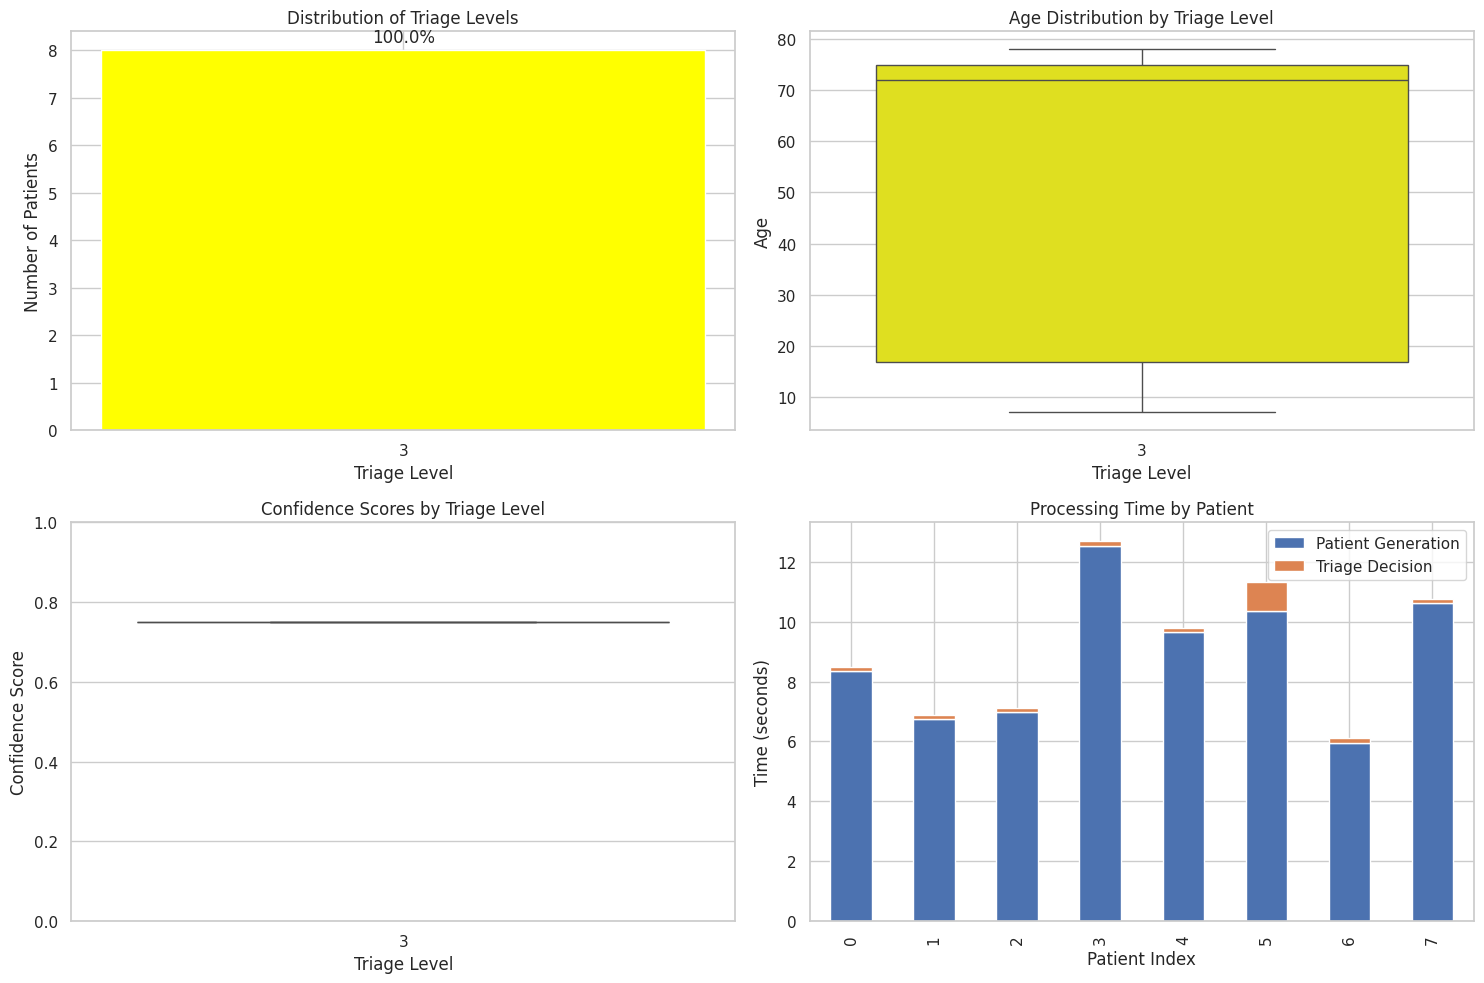


=== Key Findings ===
- Most common triage level: Level 3 (Urgent (Yellow))
- Average model confidence: 75.0%
- Gender distribution: {'Female': 6, 'Male': 2}
- Top chief complaints: Acute confusion and urinary frequency, Sudden onset confusion and urinary frequency, Allergic reaction and skin rash
- Total processing time for all 8 patients: 73.18 seconds


In [ ]:
# Run the experiment with 10 synthetic patients
# Uncomment to run the experiment
results = run_triage_experiment(num_patients=10, verbose=True)
analyze_results(results)


<div style="background-color: #f5f0fa; border-radius: 10px; padding: 20px; margin-bottom: 25px; border: 1px solid #9c27b0;">
<h2 style="color: #6a1b9a; margin-top: 0; padding-bottom: 10px; border-bottom: 2px solid #9c27b0;">✋ Hands-On Assignment</h2>
<p>Submit your observations about the benefits and shortcomings of using LLMs for medical triage. Consider what else could be done to improve the system.</p>
<h3 style="color: #6a1b9a; margin-top: 20px;">Tasks:</h3>
<ol>
    <li style="margin-bottom: 10px;"><strong>Prompt Engineering:</strong> Modify prompts for both models and observe impact on results.<br>
    <em>Prompt design has a significant effect on output quality and consistency. Try various approaches and document differences.</em></li>
<li style="margin-bottom: 10px;"><strong>Model Comparison:</strong> Test different OpenAI and Gemini models.<br>
<em>Compare results using <a href="https://platform.openai.com/docs/models" style="color: #6a1b9a;">OpenAI models</a> and <a href="https://ai.google.dev/models/gemini" style="color: #6a1b9a;">Gemini models</a>.</em></li>

<li style="margin-bottom: 10px;"><strong>Documentation:</strong> Submit your observations as a discussion post.<br>
<em>Include screenshots of chart results to support your findings and recommendations.</em></li>
</ol>

<h4 style="color: #6a1b9a; margin-top: 0;">Reflection Questions:</h4>
<ul>
    <li>What are the most promising benefits of AI-assisted triage?</li>
    <li>What are the concerning limitations or risks?</li>
    <li>How might the human-in-the-loop approach be further optimized?</li>
    <li>What additional data or features would improve model performance?</li>
</ul>
</div>
</div>

1) Most promising benefits of AI-assisted triage
- The ability of AI to quickly provide an initial triage suggestion is very helpful in a high-volume or resource-constrained medical environment. Unlike human performance, models do not suffer from fatigue, ensuring that the same rules are consistently applied to all patients, thereby reducing inconsistencies in initial triage decisions. AI can point out red flag symptoms and vitals that could potentially be overlooked in a time-pressured situation. LLMs are highly effective at creating varied artificial patient examples, which can be very helpful in triage workflow testing and training medical professionals.

2) Concerning limitations or risks
- The confidence scores provided by models are not indicative of actual clinical performance, which can be misleading. LLMs can fill in missing information or simply make up clinical data when information is not provided. Minor variations in prompts can cause large differences in output, which can be problematic. As demonstrated in the experiment, API or configuration issues can quietly mandate fallback logic that looks valid but is actually nonsensical from a clinical perspective. When demographic or proxy information is available, models can potentially exacerbate existing healthcare disparities.

3) How the human-in-the-loop approach can be further optimized
- Always escalate high-risk cases (e.g., possible ESI 1-2, unstable vitals), not just low-confidence outputs. It requires human review when two models disagree on the level of triage. It provides exact information on what vitals or symptoms contributed to the triage decision, not just a summary of the rationale. It reduces cognitive load on the clinician by only requiring review of ambiguous or high-impact cases, not all cases.

4) Additional data or features that would improve model performance
- Model performance will improve if trends are used instead of a snapshot for vitals, and if the chief complaint is standardized to reduce ambiguity. Comorbidities, high-risk meds, and resource needs will help the predictions better match the ESI triage logic. Outcomes such as admissions or ICU transfers will allow proper validation and calibration of the triage decision.